## TP 02: Aritmetica de Pixels

In [1]:
from skimage import data, io, filters

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank

In [3]:
import seaborn as sns

In [4]:
pwd

'/home/martin/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes'

### Importamos las imagenes a utilizar en la aritmética de pixels.

In [5]:
img1 = io.imread('/home/martin/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/planetario.jpg')
img2 = io.imread('/home/martin/Dropbox/doctorado/chapter00_courses/procesamiento_digital_imagenes/totem.jpg')

In [6]:
import matplotlib.image as mpimg

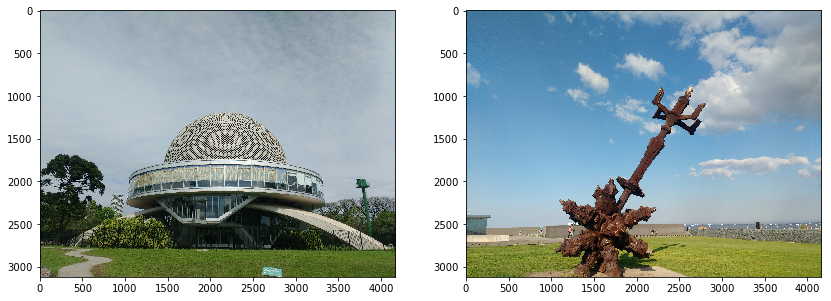

In [7]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(14, 8)
axarr[0].imshow(img1)
axarr[1].imshow(img2)
plt.show()

In [8]:
imgnorm1 = img1.astype(float) / 255
imgnorm2 = img2.astype(float) / 255

### Definimos las transformaciones a YIQ y a RGB.

In [9]:
to_yiq = np.array([[0.299,0.587, 0.114], 
                   [0.595716, -0.274453, -0.321263], 
                   [0.211456, -0.522591, 0.311135]])

In [10]:
to_rgb = np.array([[1  ,    0.9663, 0.621], 
                   [1  ,  -0.2721, -0.6474], 
                   [1  ,  -1.107, 1.7046]])

### Transformamos nuestras imagenes de entrada a los espacios YIQ

Definimos los tensores para guardar las imagenes en los espacios YIQ. El tensor yiq3 será donde guardaremos la aritmetica de suma campleada.

In [11]:
np.min(imgnorm1)

0.0

In [12]:
# Matrices para las imagenes originales
yiq1 = np.zeros((np.shape(imgnorm1)[0],np.shape(imgnorm1)[1],np.shape(imgnorm1)[2]))
yiq2 = np.zeros((np.shape(imgnorm2)[0],np.shape(imgnorm2)[1],np.shape(imgnorm2)[2]))

# Matrices para la suma campleada, suma promediada, if lighter y cuasi-restas
yiq3 = np.zeros((np.shape(imgnorm2)[0],np.shape(imgnorm2)[1],np.shape(imgnorm2)[2]))
yiq4 = np.zeros((np.shape(imgnorm2)[0],np.shape(imgnorm2)[1],np.shape(imgnorm2)[2]))
yiq5 = np.zeros((np.shape(imgnorm2)[0],np.shape(imgnorm2)[1],np.shape(imgnorm2)[2]))
yiq6 = np.zeros((np.shape(imgnorm2)[0],np.shape(imgnorm2)[1],np.shape(imgnorm2)[2]))

Transformamos las 2 imagenes originales a sus respectivos espacios YIQ.

In [13]:
yiq1 = np.matmul(imgnorm1,to_yiq.T)
yiq2 = np.matmul(imgnorm2,to_yiq.T)

In [14]:
yiq1[yiq1[:,:,0] >1,0] = 1

yiq1[yiq1[:,:,1] > 0.5957,1] = 0.5957
yiq1[yiq1[:,:,1] < -0.5957,1] = -0.5957
yiq1[yiq1[:,:,2] > 0.5226,2] = 0.5226
yiq1[yiq1[:,:,2] < -0.5226,2] = -0.5226

In [15]:
yiq2[yiq2[:,:,0] >1,0] = 1

yiq2[yiq2[:,:,1] >0.5957,1] = 0.5957
yiq2[yiq2[:,:,1] <-0.5957,1] = -0.5957
yiq2[yiq2[:,:,2] >0.5226,2] = 0.5226
yiq2[yiq2[:,:,2] <-0.5226,2] = -0.5226

# Suma Campleada

En el espacio YIQ realizamos la suma campleada de ambas imagenes y la guardamos en el tensor yiq3.

1) realizamos la operación de luminancia Y de la imagen resultante.

In [16]:
#YC := YA + YB; If YC > 1 then YC:=1;
yiq3[:,:,0] = yiq1[:,:,0]+yiq2[:,:,0]
yiq3[yiq3[:,:,0]>1,0] = 1

2) Realizamos la operación de interpolación para I.

In [17]:
#IC := (YA * IA + YB * IB) / (YA + YB) ;
yiq3[:,:,1] = ((yiq1[:,:,0]*yiq1[:,:,1])+(yiq2[:,:,0]*yiq2[:,:,1]))/(yiq1[:,:,0]*yiq2[:,:,0])

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


3) Realizamos la operación de interpolación para Q.

In [18]:
#QC := (YA * QA + YB * QB) / (YA + YB) ;
yiq3[:,:,2] =  ((yiq1[:,:,0]*yiq1[:,:,2])+(yiq2[:,:,0]*yiq2[:,:,2]))/(yiq1[:,:,0]*yiq2[:,:,0])

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


4) Nos aseguramos que la matriz YIQ se encuentre en los rangos aceptables.

In [19]:
yiq3[yiq3[:,:,0] >1,0] = 1

yiq3[yiq3[:,:,1] >0.5957,1] = 0.5957
yiq3[yiq3[:,:,1] <-0.5957,1] = -0.5957
yiq3[yiq3[:,:,2] >0.5226,2] = 0.5226
yiq3[yiq3[:,:,2] <-0.5226,2] = -0.5226

5) Transformamos la matriz YIQ en RGB.

In [20]:
img3 = np.zeros((np.shape(imgnorm1)[0],np.shape(imgnorm1)[1],np.shape(imgnorm1)[2]))
img3 = np.matmul(yiq3,to_rgb.T)

In [21]:
img3[img3 >1] = 1
img3[img3 <0] = 0

6) Imprimimos en pantalla las dos imagenes originales y la resultante de la suma campleada.

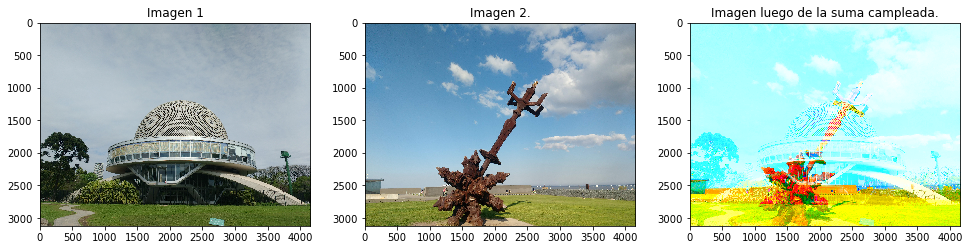

In [22]:
f41 = plt.figure()
f41.set_size_inches(16.5, 8.5)
f41.add_subplot(1,3, 1)
plt.imshow(img1)
plt.title("Imagen 1")
f41.add_subplot(1,3, 2)
plt.imshow(img2)
plt.title("Imagen 2.")
f41.add_subplot(1,3, 3)
plt.imshow(img3)
plt.title("Imagen luego de la suma campleada.")
plt.show()

# Operación Suma Promediada

1) Realizamos la operación "If Lighter" para la dimensión Y

In [23]:
#YC := YA + YB; If YC > 1 then YC:=1;
yiq4[:,:,0] = (yiq1[:,:,0]+yiq2[:,:,0])/2
yiq4[yiq4[:,:,0]>1,0] = 1

2) Calculamos la matriz de I

In [24]:
#IC := (YA * IA + YB * IB) / (YA + YB) ;
yiq4[:,:,1] = ((yiq1[:,:,0]*yiq1[:,:,1])+(yiq2[:,:,0]*yiq2[:,:,1]))/(yiq1[:,:,0]*yiq2[:,:,0])

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


3) Calculamos la matriz de Q

In [25]:
#QC := (YA * QA + YB * QB) / (YA + YB) ;
yiq4[:,:,2] =  ((yiq1[:,:,0]*yiq1[:,:,2])+(yiq2[:,:,0]*yiq2[:,:,2]))/(yiq1[:,:,0]*yiq2[:,:,0])

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


4) Nos aseguramos que la matriz YIQ se encuentre en los rangos aceptables.

In [26]:
yiq4[yiq4[:,:,0] >1,0] = 1

yiq4[yiq4[:,:,1] >0.5957,1] = 0.5957
yiq4[yiq4[:,:,1] <-0.5957,1] = -0.5957
yiq4[yiq4[:,:,2] >0.5226,2] = 0.5226
yiq4[yiq4[:,:,2] <-0.5226,2] = -0.5226

5) Transformamos el tensor YIQ a RGB

In [27]:
img4 = np.zeros((np.shape(imgnorm1)[0],np.shape(imgnorm1)[1],np.shape(imgnorm1)[2]))
img4 = np.matmul(yiq4,to_rgb.T)

In [28]:
img4[img4 >1] = 1
img4[img4 <0] = 0

6) Imprimimos en pantalla las dos imagenes originales y la resultante de la suma campleada.

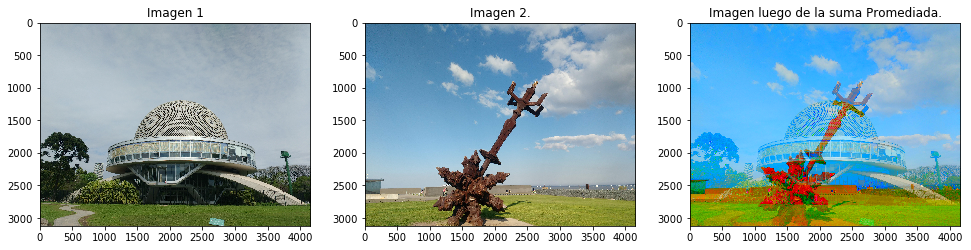

In [29]:
f41 = plt.figure()
f41.set_size_inches(16.5, 8.5)
f41.add_subplot(1,3, 1)
plt.imshow(img1)
plt.title("Imagen 1")
f41.add_subplot(1,3, 2)
plt.imshow(img2)
plt.title("Imagen 2.")
f41.add_subplot(1,3, 3)
plt.imshow(img4)
plt.title("Imagen luego de la suma Promediada.")
plt.show()

# Operación cuasi-suma "if-lighter".

1) Realizamos la operación "if lighter".

In [30]:
#if YA > YB then {YC := YA; IC := IA; QC := QA}
#else {YC := YB; IC := IB; QC := QB};

for i in range(0,np.shape(yiq1)[0]):
    for j in range(0,np.shape(yiq1)[1]):
        if yiq1[i,j,0]>yiq2[i,j,0]:
            yiq5[i,j,0] = yiq1[i,j,0]
            yiq5[i,j,1] = yiq1[i,j,1]
            yiq5[i,j,2] = yiq1[i,j,2]
        else:
            yiq5[i,j,0] = yiq2[i,j,0]
            yiq5[i,j,1] = yiq2[i,j,1]
            yiq5[i,j,2] = yiq2[i,j,2]

2) Aseguramos que la nueva matriz YIQ no se vaya de rango.

In [31]:
yiq5[yiq5[:,:,0] >1,0] = 1

In [32]:
yiq5[yiq5[:,:,1] >0.5957,1] = 0.5957
yiq5[yiq5[:,:,1] <-0.5957,1] = -0.5957
yiq5[yiq5[:,:,2] >0.5226,2] = 0.5226
yiq5[yiq5[:,:,2] <-0.5226,2] = -0.5226

3) Creamos la matriz RGB 

In [33]:
img5 = np.zeros((np.shape(img1)[0],np.shape(img1)[1],np.shape(img1)[2]))

In [34]:
img5 = np.matmul(yiq5,to_rgb.T)

In [35]:
img5[img5 >1] = 1
img5[img5 <0] = 0

4) Imprimimos en pantalla el resultado de la operación "if Lighter"

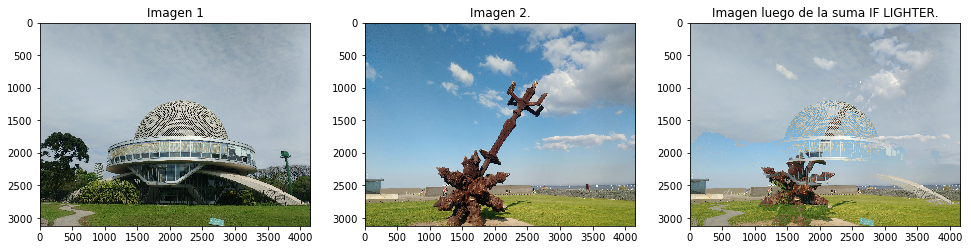

In [36]:
f41 = plt.figure()
f41.set_size_inches(16.5, 8.5)
f41.add_subplot(1,3, 1)
plt.imshow(img1)
plt.title("Imagen 1")
f41.add_subplot(1,3, 2)
plt.imshow(img2)
plt.title("Imagen 2.")
f41.add_subplot(1,3, 3)
plt.imshow(img5)
plt.title("Imagen luego de la suma IF LIGHTER.")
plt.show()

# Cuasi-resta Promediada

1) Creamos la matriz RGB donde alojaremos la cuasi resta promediada

In [37]:
imgrest = np.zeros((np.shape(img1)[0],np.shape(img1)[1],np.shape(img1)[2]))

2) Realizamos la operación de cuasi resta promediada. Luego nos aseguramos que los valores RGB esten dentro de lo establecido.

In [38]:
imgrest[:,:,0] = (imgnorm1[:,:,0]-imgnorm2[:,:,0])/2
imgrest[:,:,1] = (imgnorm1[:,:,1]-imgnorm2[:,:,1])/2
imgrest[:,:,2] = (imgnorm1[:,:,2]-imgnorm2[:,:,2])/2

In [39]:
imgrest[imgrest >1] = 1
imgrest[imgrest <0] = 0

3) Imprimimos en pantalla los resultados.

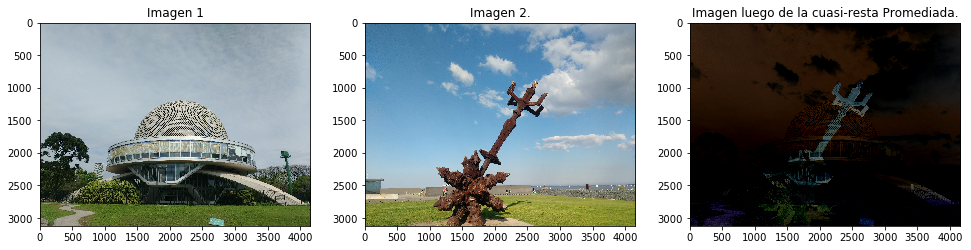

In [40]:
f41 = plt.figure()
f41.set_size_inches(16.5, 8.5)
f41.add_subplot(1,3, 1)
plt.imshow(img1)
plt.title("Imagen 1")
f41.add_subplot(1,3, 2)
plt.imshow(img2)
plt.title("Imagen 2.")
f41.add_subplot(1,3, 3)
plt.imshow(imgrest)
plt.title("Imagen luego de la cuasi-resta Promediada.")
plt.show()

# Cuasi-resta clampeada

Realizamos la resta campleada para los 3 canales RGB.

In [41]:
imgrestclamp = np.zeros((np.shape(img1)[0],np.shape(img1)[1],np.shape(img1)[2]))

In [42]:
imgrestclamp[:,:,0] = (imgnorm1[:,:,0]-imgnorm2[:,:,0])
imgrestclamp[:,:,1] = (imgnorm1[:,:,1]-imgnorm2[:,:,1])
imgrestclamp[:,:,2] = (imgnorm1[:,:,2]-imgnorm2[:,:,2])

In [43]:
imgrestclamp[imgrestclamp >1] = 1
imgrestclamp[imgrestclamp <0] = 0

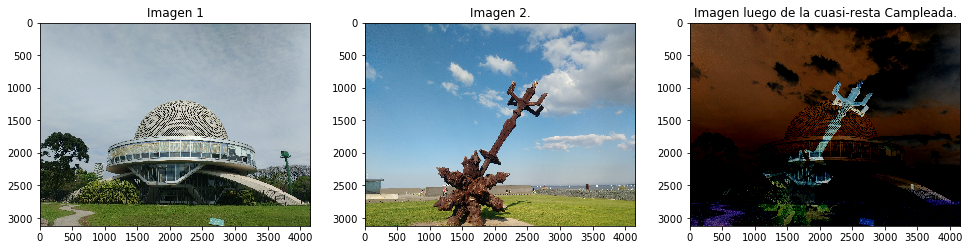

In [44]:
f41 = plt.figure()
f41.set_size_inches(16.5, 8.5)
f41.add_subplot(1,3, 1)
plt.imshow(img1)
plt.title("Imagen 1")
f41.add_subplot(1,3, 2)
plt.imshow(img2)
plt.title("Imagen 2.")
f41.add_subplot(1,3, 3)
plt.imshow(imgrestclamp)
plt.title("Imagen luego de la cuasi-resta Campleada.")
plt.show()